# **Exercicio Duelo de Modelos 4**

Nesta tarefa, vocês irão criar o seu próprio duelo de modelos, com o objetivo de superar os resultados apresentados em aula. O desafio é alcançar um desempenho superior ao que obtivemos, e para isso, será necessário aplicar todas as melhorias que vocês aprenderam ao longo dos módulos, utilizando a base de dados do Titanic.

**1. Escolha do Modelo:**
Selecione um dos modelos que foram explorados nos duelos de modelos ao longo do curso. Pode ser SVM, Random Forest, XGBoost, ou qualquer outro que tenhamos abordado.

**2. Aperfeiçoamento:**
**Aplique as técnicas que aprendemos para melhorar o desempenho do seu modelo:**

**Hiperparâmetros:** Utilize GridSearchCV ou RandomSearchCV para encontrar os melhores parâmetros.

**Cross Validation:** Avalie a robustez do modelo utilizando validação cruzada para garantir que ele generaliza bem.

**Balanceamento de Classes:** Se o seu modelo lida com problemas de classes desbalanceadas, explore técnicas como SMOTE, undersampling ou oversampling.

**Padronização e Normalização:** Lembre-se de padronizar os dados, especialmente se for usar modelos que são sensíveis à escala das variáveis.

**3. Submissão no Kaggle:**
Treine o seu modelo com os dados de treino e gere as previsões para os dados de teste. Lembre-se de que o conjunto de teste não possui a variável alvo (y_test), pois a avaliação será feita com base nas submissões no Kaggle.
Submeta suas previsões na competição do Titanic no Kaggle.

**4. Entrega:**
Envie o código que você desenvolveu, detalhando cada etapa do seu processo de modelagem, explicando as escolhas feitas e como essas ajudaram a melhorar o modelo.

Junto com o código, envie um print do seu score obtido na plataforma do Kaggle. Esse score será a sua métrica final de avaliação, mostrando como o seu modelo se compara com os demais.

**5. Competição Saudável:**
A ideia é trazer um senso de competição saudável, então não vale replicar exatamente o que fizemos na aula! Inove, explore novas combinações de parâmetros e técnicas, e mostre do que é capaz. O importante é exercitar o pensamento crítico e a capacidade de experimentar.

**Dicas Finais:**

Seja criativo e tenha um olhar crítico sobre o que pode ser melhorado.
Teste diferentes abordagens e não se prenda a um único caminho.
Lembre-se de que, mais do que alcançar o melhor score, o objetivo é aprender e aplicar o conhecimento de forma prática e eficaz.
Boa sorte! Estamos ansiosos para ver como cada um de vocês vai se sair nesse desafio e quais insights irão surgir dessa competição!

Ao final dessa atividade vocês terão participado da primeira competição publica de ciência de dados de vocês = )




In [1]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

from sklearn.model_selection import cross_val_predict, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

from imblearn.over_sampling import SMOTE

import xgboost as xgb

# Importação dos dados e tratamento 

In [2]:
df_treino = pd.read_csv("train_titanic.csv")
df_teste = pd.read_csv("test_titanic.csv")

# cópias para preservar dados brutos
train = df_treino.copy()
test = df_teste.copy()


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Observando os dados
print(train.info(),'\n\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Removendo colunas irrelevantes
train.drop(columns=['PassengerId',  'Ticket'], inplace=True)
test.drop(columns=['PassengerId', 'Ticket'], inplace=True)

In [8]:
# Preenchendo os nulos em Age com a mediana devido a distribuição assimétrica dos dados
train['Age'] = train['Age'].fillna(train['Age'].median())

In [9]:
# Tratando a coluna Cabin, criando uma nova variável binária indicando se a cabine é conhecida ou não
train['Has_Cabin'] = train['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
test['Has_Cabin'] = test['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

In [10]:
# Substituindo os nulos de embarked pela moda
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(train['Embarked'].mode()[0])

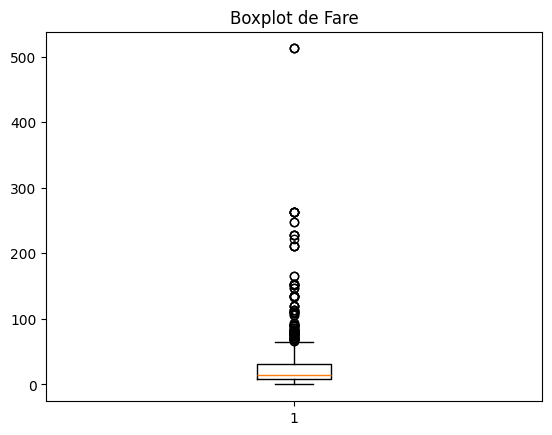

In [11]:
# Observando a possível presença de outliers em Fare
plt.boxplot(train['Fare'])
plt.title('Boxplot de Fare')
plt.show()

A presença de outliers neste dataset parece realista. Por exemplo, a variável Fare apresenta valores considerados extremos, como tarifas acima de 500, que, apesar de destoarem do restante da distribuição, são plausíveis dentro do contexto histórico do Titanic. Dado que a sobrevivência foi influenciada por fatores socioeconômicos, manter esses outliers é importante, pois eles podem refletir passageiros de classes mais altas com maior probabilidade de sobrevivência.

# Engenharia de features

In [12]:
# Tamanho da família
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Está sozinho
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

# Taxa por pessoa
train['Fare_per_person'] = train['Fare'] / train['FamilySize']

# Criando as mesmas features para o test
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)
test['Fare_per_person'] = test['Fare'] / test['FamilySize']


In [13]:
# Extraindo os títulos dos passageiros, possível relação com classe socioeconômica que é relavante para a taxa de sobrevivência
train['Title'] = train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


# Agrupar títulos raros
for df in [train, test]:
    df['Title'] = df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
    df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

train.drop('Name', axis=1, inplace=True)
test.drop('Name',axis=1, inplace=True)

In [14]:
# Utilizando o LabelEncoder em Sex 
le = LabelEncoder()
for df in [train, test]:
    df['Sex'] = le.fit_transform(df['Sex'])
   
# One-hot para Embarked, Title
train = pd.get_dummies(train, columns=['Embarked', 'Title'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked', 'Title'], drop_first=True)

# Garantindo que os dois conjuntos tenham o mesmo número de colunas
test = test.reindex(columns=train.drop('Survived', axis=1).columns, fill_value=0)

In [15]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Fare_per_person,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,1,22.0,1,0,7.2500,0,2,0,3.62500,False,True,False,True,False,False
1,1,1,0,38.0,1,0,71.2833,1,2,0,35.64165,False,False,False,False,True,False
2,1,3,0,26.0,0,0,7.9250,0,1,1,7.92500,False,True,True,False,False,False
3,1,1,0,35.0,1,0,53.1000,1,2,0,26.55000,False,True,False,False,True,False
4,0,3,1,35.0,0,0,8.0500,0,1,1,8.05000,False,True,False,True,False,False


# Pré processamento e treinamento do modelo

In [16]:
# Separando a variável target do dataset de treino
X = train.drop('Survived', axis=1)
y = train['Survived']

In [17]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Fare_per_person,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,1,22.0,1,0,7.2500,0,2,0,3.62500,False,True,False,True,False,False
1,1,0,38.0,1,0,71.2833,1,2,0,35.64165,False,False,False,False,True,False
2,3,0,26.0,0,0,7.9250,0,1,1,7.92500,False,True,True,False,False,False
3,1,0,35.0,1,0,53.1000,1,2,0,26.55000,False,True,False,False,True,False
4,3,1,35.0,0,0,8.0500,0,1,1,8.05000,False,True,False,True,False,False


In [18]:
# Balanceando a variável target com SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X,y)

# Separando conjuntos de treino e teste para validação interna
X_train, X_val, y_train, y_val = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)

In [19]:
# Instânciando o modelo
xgb_model = xgb.XGBClassifier()

# Grid de hiperparâmetros
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [3,4,5],
    'learning_rate': [0.01,0.05,0.1],
    'subsample': [0.7,0.8,1.0],
    'colsample_bytree': [0.7,0.8,1.0],
    'min_child_weight': [1,2,3],
    'gamma': [0,0.1,0.2],
    'reg_alpha': [0,0.01,0.1],
    'reg_lambda': [1,1.5,2]
}

# Criando o modelo com GridSearch para melhor resultado possível
grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# Treinamento
grid_xgb.fit(X_train, y_train)


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.7, 0.8, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], ...}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


# Avaliando o modelo e retreinando com toda a base de treino

In [25]:
# Avaliando o melhor modelo 
best_xgb = grid_xgb.best_estimator_

y_val_pred = best_xgb.predict(X_val)
print(classification_report(y_val, y_val_pred))
print('\n\nMatriz de confusão:\n', confusion_matrix(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       110
           1       0.91      0.87      0.89       110

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



Matriz de confusão:
 [[101   9]
 [ 14  96]]


In [26]:
# Observando as melhores features
importances = best_xgb.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame(list(importances.items()), columns=['Feature', 'Importance'])
importance_df['Importance'] = importance_df['Importance'].astype(float)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

            Feature  Importance
1               Sex   50.643330
12         Title_Mr   13.224209
0            Pclass   10.198000
7        FamilySize    5.682005
11       Title_Miss    5.576934
6         Has_Cabin    4.892425
3             SibSp    3.458578
2               Age    3.283531
8   Fare_per_person    3.163007
5              Fare    2.878472
13        Title_Mrs    2.799771
9        Embarked_Q    2.357062
14       Title_Rare    1.775124
10       Embarked_S    1.674769
4             Parch    1.132794


In [27]:
# Retreinando o melhor modelo com toda a base de treino
best_xgb.fit(X_balanced,y_balanced)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [28]:
# Observando resultados do melhor modelo com validação cruzada
y_pred_cv = cross_val_predict(best_xgb, X_balanced, y_balanced, cv=5)
print(classification_report(y_balanced, y_pred_cv))
print('\n\nMatriz de confusão:\n', confusion_matrix(y_balanced,y_pred_cv))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.86      0.82      0.84       549

    accuracy                           0.85      1098
   macro avg       0.85      0.85      0.85      1098
weighted avg       0.85      0.85      0.85      1098



Matriz de confusão:
 [[478  71]
 [ 98 451]]


In [29]:
# features mais importantes para o modelo treinado com a base completa
importances = best_xgb.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame(list(importances.items()), columns=['Feature', 'Importance'])
importance_df['Importance'] = importance_df['Importance'].astype(float)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)
print('\n\nMelhores parâmetros', grid_xgb.best_params_)

            Feature  Importance
1               Sex   50.643330
12         Title_Mr   13.224209
0            Pclass   10.198000
7        FamilySize    5.682005
11       Title_Miss    5.576934
6         Has_Cabin    4.892425
3             SibSp    3.458578
2               Age    3.283531
8   Fare_per_person    3.163007
5              Fare    2.878472
13        Title_Mrs    2.799771
9        Embarked_Q    2.357062
14       Title_Rare    1.775124
10       Embarked_S    1.674769
4             Parch    1.132794


Melhores parâmetros {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1.5, 'subsample': 0.8}


# Criando as previsões para enviar no kaggle

In [30]:
y_pred_final = best_xgb.predict(test)
submission = pd.DataFrame({
    'PassengerId': df_teste['PassengerId'],
    'Survived': y_pred_final
})

submission.to_csv('submission.csv', index=False)

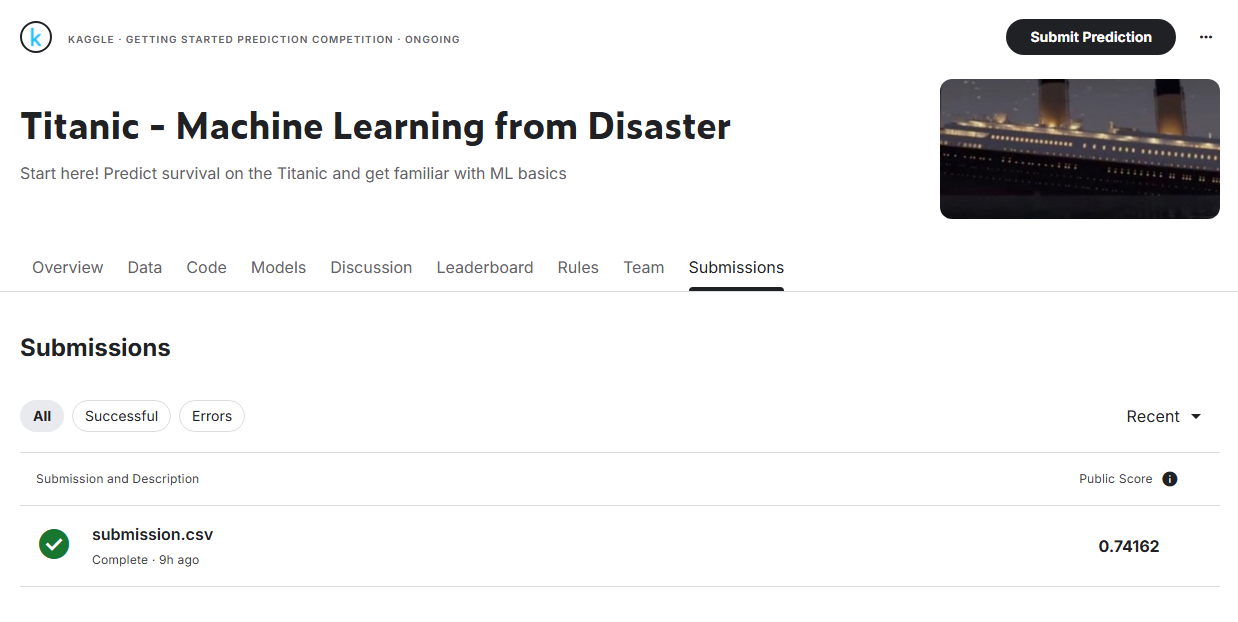

180 carne, 200 arroz, 160 macarao

# Resumo do Projeto – Predição de Sobreviventes do Titanic (XGBoost)
### 1. Tratamento dos Dados

* Removidas colunas irrelevantes (PassengerId, Name, Ticket).

* Valores nulos tratados: Age (mediana), Embarked (amostragem proporcional), Cabin → criada Has_Cabin.

* Mantidos outliers de Fare, pois refletem a realidade (passagens caras).

### 2. Engenharia de Features

Criadas variáveis:
* FamilySize, IsAlone, Fare_per_person, Has_Cabin e Title (extraído de Name).

* Categóricas codificadas com LabelEncoder e get_dummies().

### 3. Pré-processamento

* Aplicado SMOTE para balancear as classes.

### 4. Treinamento e Otimização

* Modelo: XGBoost.

* Busca de hiperparâmetros com GridSearchCV + StratifiedKFold.

* Melhores parâmetros encontrados:

* {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1,
 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100,
 'reg_alpha': 0, 'reg_lambda': 1.5, 'subsample': 0.8}


* Modelo final retreinado com todo o conjunto balanceado.

### 5. Avaliação

* Accuracy: 0.85

* F1-score médio: 0.85

* Matriz de confusão:
[[478 71], [98 451]]

* Principais features: Sex, Title_Mr, Pclass, FamilySize, Title_Miss, Has_Cabin.

### 6. Resultado Final

* Submissão no Kaggle: score 0.74162, compatível com o limite superior de modelos clássicos e exatamente o mesmo resultado do modelo criado em aula.

* O desempenho reflete um pipeline limpo, bem balanceado e com bom poder de generalização.

### 7. Conclusão

* O modelo atinge o nível esperado para abordagens tabulares clássicas.
Para avanços, o foco deve estar em novas features ou ensembles, pois os ganhos com tuning adicional são marginais.